In [1]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 108 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.7 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638957 sha256=62cac51054d958f0f0c98b17218d54b1169d1ff517b7cfed1f6ba798e7db3734
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
ERROR: pip's dependency resolver does not currently take into account all the 

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
from datetime import date
import tensorflow as tf


In [3]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from fbprophet import Prophet
from dateutil.relativedelta import relativedelta
from matplotlib import pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv('/content/dataset.csv')
df

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.520
1,NaN,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.620
2,NaN,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.680
3,NaN,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.780
4,NaN,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,NaN,6,454.0,931.8,13.6,125.0,13,116,4150,830,15.1,1.8,1.0,15,1.681
1005,NaN,7,454.0,703.0,14.5,17.0,13,118,4150,830,24.6,7.9,2.0,15,1.838
1006,NaN,8,454.0,1124.1,14.9,45.0,18,117,4200,840,119.0,15.7,2.0,16,1.862
1007,NaN,9,454.0,1462.3,13.2,62.0,27,117,4400,720,138.2,30.5,6.0,18,1.883


In [5]:
def rmse(x,y):
  return np.sqrt(mean_squared_error(x, y))

In [6]:
dataf_final=pd.DataFrame(columns=['Sec No','Para','Actual Value','Predicted Value','Ceiling Value'])
dataf_final_rmse=pd.DataFrame(columns=['Sec','RMSE','RSME with Ceiling Value'])

In [7]:
startr=0
endr=10
while endr!=1020:
  df_section_1=df.iloc[startr:endr,1:]
  df_section_1['year'].astype(int)
  ind=startr
  for i in df_section_1['year']:
    df_section_1.at[ind,'year'] = date.today() + timedelta(days=i)
    ind+=1
  df_section_1.rename(columns={'year':'ds','Para-9':'y','Para-10':'y','Para-11':'y','Para-12':'y','Para-13':'y'},inplace=True)
  df_section_1_Para9=pd.concat([df_section_1.iloc[:9,:9],df_section_1.iloc[:9,9]],axis=1)
  df_section_1_Para10=pd.concat([df_section_1.iloc[:9,:9],df_section_1.iloc[:9,10]],axis=1)
  df_section_1_Para11=pd.concat([df_section_1.iloc[:9,:9],df_section_1.iloc[:9,11]],axis=1)
  df_section_1_Para12=pd.concat([df_section_1.iloc[:9,:9],df_section_1.iloc[:9,12]],axis=1)
  df_section_1_Para13=pd.concat([df_section_1.iloc[:9,:9],df_section_1.iloc[:9,13]],axis=1)
  # print(df_section_1)
  # print(df_section_1_Para12)
  # Model for Para-9
  model_pro1=Prophet(interval_width=0.95)
  model_pro1.add_regressor('Para-1')
  model_pro1.add_regressor('Para-2')
  model_pro1.add_regressor('Para-3')
  model_pro1.add_regressor('Para-4')
  model_pro1.add_regressor('Para-5')
  model_pro1.add_regressor('Para-6')
  model_pro1.add_regressor('Para-7')
  model_pro1.add_regressor('Para-8')
  model_pro1.fit(df_section_1_Para9)
  future1=df_section_1.iloc[8:10,:9]
  forecast1=model_pro1.predict(future1)
  # Model for Para-10
  model_pro2=Prophet(interval_width=0.95)
  model_pro2.add_regressor('Para-1')
  model_pro2.add_regressor('Para-2')
  model_pro2.add_regressor('Para-3')
  model_pro2.add_regressor('Para-4')
  model_pro2.add_regressor('Para-5')
  model_pro2.add_regressor('Para-6')
  model_pro2.add_regressor('Para-7')
  model_pro2.add_regressor('Para-8')
  model_pro2.fit(df_section_1_Para10)
  future2=df_section_1.iloc[8:10,:9]
  forecast2=model_pro2.predict(future2)
  # Model for Para-11
  model_pro3=Prophet(interval_width=0.95)
  model_pro3.add_regressor('Para-1')
  model_pro3.add_regressor('Para-2')
  model_pro3.add_regressor('Para-3')
  model_pro3.add_regressor('Para-4')
  model_pro3.add_regressor('Para-5')
  model_pro3.add_regressor('Para-6')
  model_pro3.add_regressor('Para-7')
  model_pro3.add_regressor('Para-8')
  model_pro3.fit(df_section_1_Para11)
  future3=df_section_1.iloc[8:10,:9]
  forecast3=model_pro3.predict(future3)
  # Model for Para-12
  model_pro4=Prophet(interval_width=0.95)
  model_pro4.add_regressor('Para-1')
  model_pro4.add_regressor('Para-2')
  model_pro4.add_regressor('Para-3')
  model_pro4.add_regressor('Para-4')
  model_pro4.add_regressor('Para-5')
  model_pro4.add_regressor('Para-6')
  model_pro4.add_regressor('Para-7')
  model_pro4.add_regressor('Para-8')
  model_pro4.fit(df_section_1_Para12)
  future4=df_section_1.iloc[8:10,:9]
  forecast4=model_pro4.predict(future4)
  # Model for Para-13
  model_pro5=Prophet(interval_width=0.95)
  model_pro5.add_regressor('Para-1')
  model_pro5.add_regressor('Para-2')
  model_pro5.add_regressor('Para-3')
  model_pro5.add_regressor('Para-4')
  model_pro5.add_regressor('Para-5')
  model_pro5.add_regressor('Para-6')
  model_pro5.add_regressor('Para-7')
  model_pro5.add_regressor('Para-8')
  model_pro5.fit(df_section_1_Para13)
  future5=df_section_1.iloc[8:10,:9]
  forecast5=model_pro5.predict(future5)
  act=[]
  pred=[]
  pred_upper=[]
  act.append(df_section_1.iloc[9,9])
  act.append(df_section_1.iloc[9,10])
  act.append(df_section_1.iloc[9,11])
  act.append(df_section_1.iloc[9,12])
  act.append(df_section_1.iloc[9,13])
  pred.append(forecast1['yhat'][1])
  pred.append(forecast2['yhat'][1])
  pred.append(forecast3['yhat'][1])
  pred.append(forecast4['yhat'][1])
  pred.append(forecast5['yhat'][1])
  pred_upper.append(forecast1['yhat_upper'][1])
  pred_upper.append(forecast2['yhat_upper'][1])
  pred_upper.append(forecast3['yhat_upper'][1])
  pred_upper.append(forecast4['yhat_upper'][1])
  pred_upper.append(forecast5['yhat_upper'][1])
  dataf_final.loc[len(dataf_final)]=[endr//10,'Para9',df_section_1.iloc[9,9],forecast1['yhat'][1],forecast1['yhat_upper'][1]]
  dataf_final.loc[len(dataf_final)]=[endr//10,'Para10',df_section_1.iloc[9,10],forecast2['yhat'][1],forecast2['yhat_upper'][1]]
  dataf_final.loc[len(dataf_final)]=[endr//10,'Para11',df_section_1.iloc[9,11],forecast3['yhat'][1],forecast3['yhat_upper'][1]]
  dataf_final.loc[len(dataf_final)]=[endr//10,'Para12',df_section_1.iloc[9,12],forecast4['yhat'][1],forecast4['yhat_upper'][1]]
  dataf_final.loc[len(dataf_final)]=[endr//10,'Para13',df_section_1.iloc[9,13],forecast5['yhat'][1],forecast5['yhat_upper'][1]]
  dataf_final_rmse.loc[len(dataf_final_rmse)]=[int(endr//10),rmse(act,pred),rmse(act,pred_upper)]
  startr+=10
  endr+=10

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disab

IndexError: ignored

In [8]:
dataf_final

,Sec No,Para,Actual Value,Predicted Value,Ceiling Value
0,1,Para9,16.800,2.505680,2.885156
1,1,Para10,105.000,53.584791,57.194087
2,1,Para11,65.000,23.432458,31.990188
3,1,Para12,9.000,7.777151,8.135499
4,1,Para13,1.960,1.919439,1.952898
...,...,...,...,...,...
495,100,Para9,0.000,193.700000,193.700000
496,100,Para10,0.000,305.600000,305.600000
497,100,Para11,0.000,180.000000,180.000000
498,100,Para12,2.000,12.000000,12.000000


In [9]:
dataf_final_rmse

,Sec,RMSE,RSME with Ceiling Value
0,1.0,30.256269,26.718620
1,2.0,14.211630,15.064116
2,3.0,13.370598,13.674842
3,4.0,15.523008,16.112820
4,5.0,8.630230,3.311826
...,...,...,...
95,96.0,16.273432,16.273432
96,97.0,130.329682,130.329682
97,98.0,36.065729,36.065729
98,99.0,66.955314,66.955314


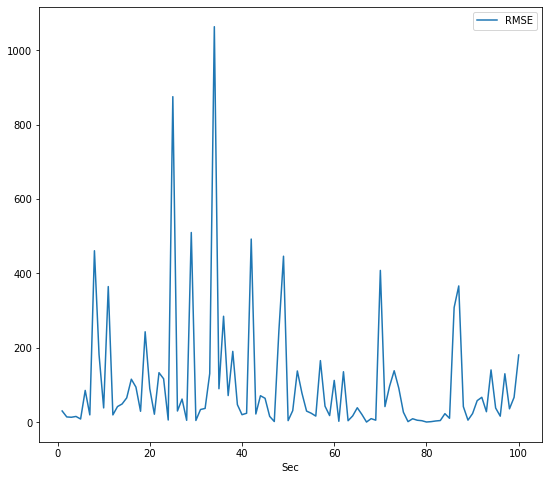

In [12]:
dataf_final_rmse.plot(x="Sec", y="RMSE", figsize=(9, 8))

In [14]:
print('Average RMSE : ',np.mean(dataf_final_rmse.iloc[0:9]['RMSE']))

Average RMSE :  92.23774759734829
